### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Top 10 paesi per consumo di alcool:
                 country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
45       Czech Republic                          11.8
61               France                          11.8
141  Russian Federation                          11.5
81              Ireland                          11.4
155            Slovakia                          11.4
99           Luxembourg                          11.4

Media del consumo:
 beer_servings      106.160622
spirit_servings     80.994819
wine_servings       49.450777
dtype: float64

paese con il massimo alcohol_index: Andorra (231.66666666666666)

Paesi che consumano più di 100 birre annualmente: 
                country  beer_servings
3              Andorra            245
4               Angola            217
5    Antig

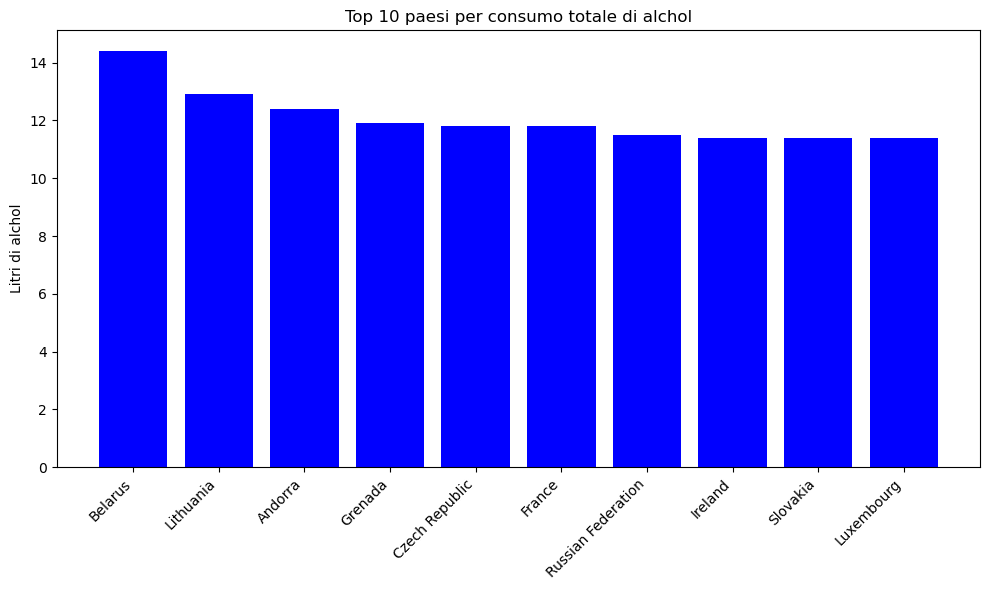

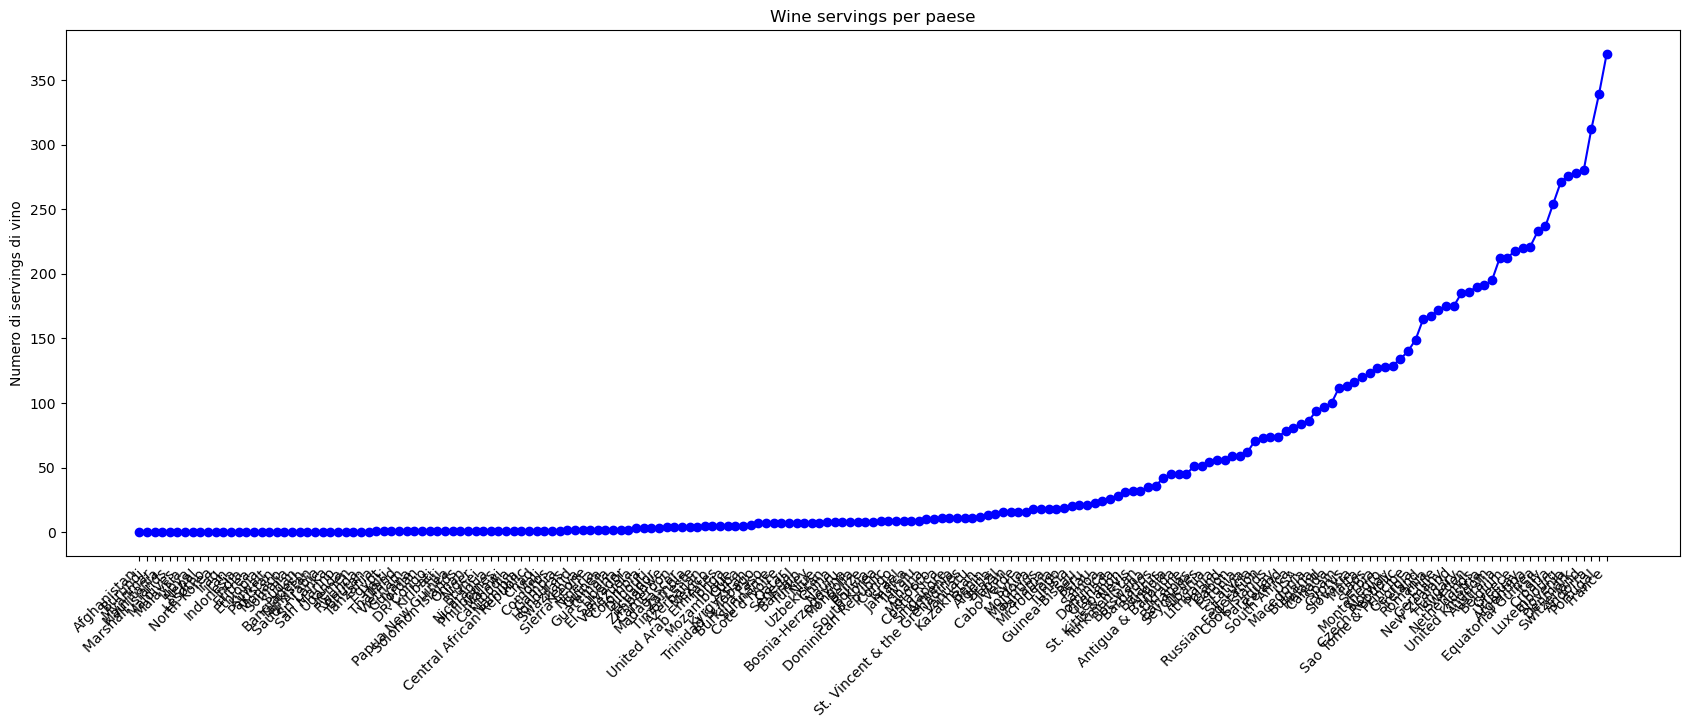

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df_alcohol = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

df_alcohol.columns = df_alcohol.columns.str.replace(' ', '_')

# 1. top 10 paesi per consumo di alcool
top10 = df_alcohol.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
print('Top 10 paesi per consumo di alcool:\n',top10[['country', 'total_litres_of_pure_alcohol']])

# 2. media del consumo di birra, vino e distillati
mean_alc = df_alcohol[['beer_servings', 'spirit_servings', 'wine_servings']].mean()
print('\nMedia del consumo:\n',mean_alc)

# 3. nuova colonna alcohol_index
df_alcohol['alcohol_index'] = (df_alcohol.beer_servings + df_alcohol.wine_servings + df_alcohol.spirit_servings) / 3

# 4. paese con valore massimo di alcohol_index
max_index = df_alcohol['alcohol_index'].idxmax()
max_country = df_alcohol.loc[max_index, 'country']
max_value = df_alcohol.loc[max_index, 'alcohol_index']
print(f'\npaese con il massimo alcohol_index: {max_country} ({max_value})')

# 5. filtrare solo i paesi che consumano più di 100 birre
beer_100 = df_alcohol[df_alcohol['beer_servings'] > 100]
print('\nPaesi che consumano più di 100 birre annualmente: \n',beer_100[['country', 'beer_servings']])

# 6. barchar 
plt.figure(figsize=(10,6))
plt.bar(top10['country'], top10['total_litres_of_pure_alcohol'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 paesi per consumo totale di alchol')
plt.ylabel('Litri di alchol')
plt.tight_layout()
plt.show()

# 7. lineplot
sorted_df = df_alcohol.sort_values(by='wine_servings')

plt.figure(figsize=(17,6))
plt.plot(sorted_df['country'], sorted_df['wine_servings'], color='blue', marker='o', linestyle='-')
plt.title('Wine servings per paese')
plt.ylabel('Numero di servings di vino')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [18]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.columns = df.columns.str.replace(' ', '_')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df[df['salary_year_avg'].notna() & df['job_country'].notna()]

c:\Users\sarad\miniconda3\envs\labPython\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# 1. stipendio medio annuale 
salary_avg = df.groupby('job_country')['salary_year_avg'].mean().sort_values(ascending=True)

# 2. numero totale delle offerte di lavoro
job_counts = df['job_country'].value_counts()

# 3. intervallo degli stipendi
salary_range = df.groupby('job_country')['salary_year_avg'].agg(['min', 'max'])

stats_country = pd.concat([salary_avg, job_counts, salary_range], axis=1)
stats_country.columns = ['salary_year_avg', 'job_counts', 'min_salary', 'max_salary']
stats_country.sort_values(by='salary_year_avg', ascending=False)


,salary_year_avg,job_counts,min_salary,max_salary
job_country,,,,
Belarus,400000.000000,1,400000.0,400000.0
Russia,292500.000000,4,250000.0,320000.0
Bahamas,201511.619048,21,173500.0,284016.0
Dominican Republic,157500.000000,1,157500.0,157500.0
Northern Mariana Islands,155485.500000,1,155485.5,155485.5
...,...,...,...,...
Honduras,63000.000000,1,63000.0,63000.0
Bangladesh,60981.333333,3,16500.0,97444.0
Montenegro,53014.000000,1,53014.0,53014.0


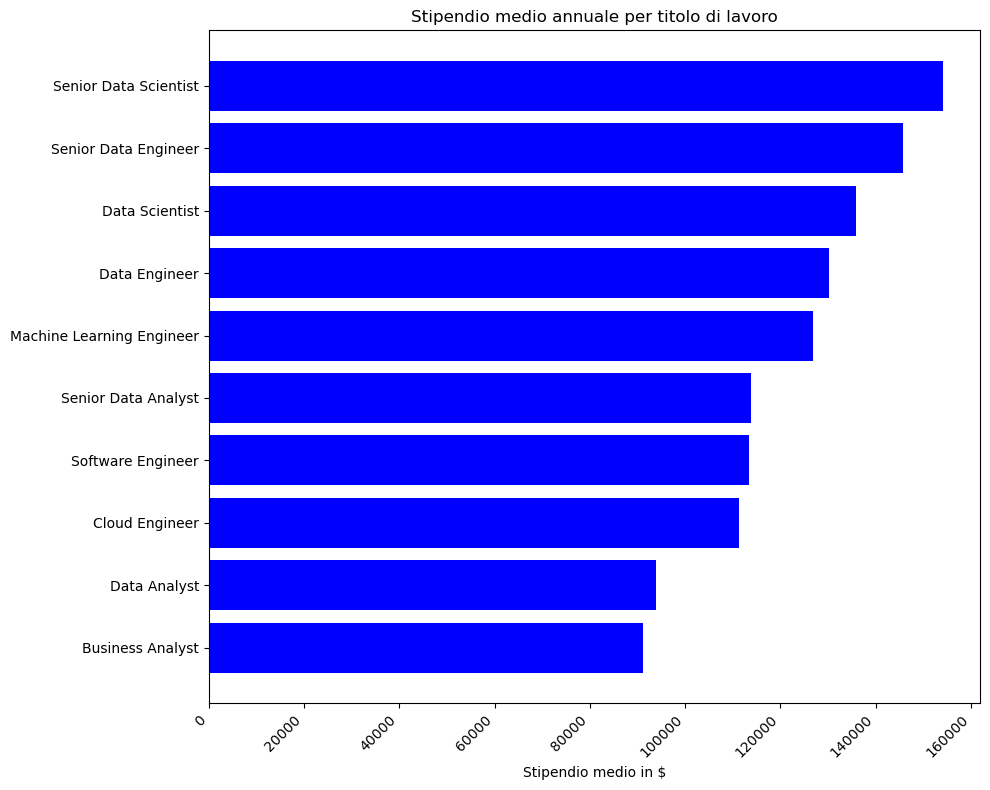

In [20]:
# grafico a barre orrizzontali

avg_salary_by_title = (
    df.groupby('job_title_short')['salary_year_avg']
    .mean()
    .sort_values(ascending=True)
)

plt.figure(figsize=(10,8))
plt.barh(avg_salary_by_title.index, avg_salary_by_title, color='blue')
plt.title('Stipendio medio annuale per titolo di lavoro')
plt.xlabel('Stipendio medio in $')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()